In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [429]:
df_engine=pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\luminar\\ml_project\\final\\datasets\\engine_health_codered_FINAL.csv")
df_engine

,Car_ID,Oil_Level,Oil_Quality_Score,Avg_Engine_Temp,Engine_Damage_Score,Overheat_Events,Km_Driven,Engine_Remaining_Years
0,1,25.837835,8.707456,99.584207,6.389954,4,64948.194170,8.292160
1,2,44.236115,2.131193,106.339966,3.268826,3,117215.103594,4.954162
2,3,97.780370,8.805892,102.082151,1.889099,1,0.000000,15.000000
3,4,13.445407,1.507811,119.121369,6.315040,6,123553.765207,0.200000
4,5,50.532537,5.574147,69.385593,7.359965,3,176379.905284,6.907193
...,...,...,...,...,...,...,...,...
5995,5996,57.116592,5.462009,89.007083,2.644387,0,257240.732423,9.680524
5996,5997,20.071926,4.789991,112.846495,7.276473,4,61647.137324,5.370842
5997,5998,47.735691,3.966054,103.617007,9.817317,2,76056.933481,5.212902
5998,5999,8.889503,8.426798,103.900106,2.503764,4,186633.414346,5.156954


In [430]:
df_engine.shape

(6000, 8)

In [431]:
df_engine.head()


,Car_ID,Oil_Level,Oil_Quality_Score,Avg_Engine_Temp,Engine_Damage_Score,Overheat_Events,Km_Driven,Engine_Remaining_Years
0,1,25.837835,8.707456,99.584207,6.389954,4,64948.194170,8.292160
1,2,44.236115,2.131193,106.339966,3.268826,3,117215.103594,4.954162
2,3,97.780370,8.805892,102.082151,1.889099,1,0.000000,15.000000
3,4,13.445407,1.507811,119.121369,6.315040,6,123553.765207,0.200000
4,5,50.532537,5.574147,69.385593,7.359965,3,176379.905284,6.907193


In [432]:
df_engine.tail()

,Car_ID,Oil_Level,Oil_Quality_Score,Avg_Engine_Temp,Engine_Damage_Score,Overheat_Events,Km_Driven,Engine_Remaining_Years
5995,5996,57.116592,5.462009,89.007083,2.644387,0,257240.732423,9.680524
5996,5997,20.071926,4.789991,112.846495,7.276473,4,61647.137324,5.370842
5997,5998,47.735691,3.966054,103.617007,9.817317,2,76056.933481,5.212902
5998,5999,8.889503,8.426798,103.900106,2.503764,4,186633.414346,5.156954
5999,6000,52.132109,3.629662,100.479209,2.984084,4,0.000000,10.347880


In [433]:
df_engine.columns

Index(['Car_ID', 'Oil_Level', 'Oil_Quality_Score', 'Avg_Engine_Temp',
       'Engine_Damage_Score', 'Overheat_Events', 'Km_Driven',
       'Engine_Remaining_Years'],
      dtype='object')

In [434]:
df_engine.isna().sum()


Car_ID                      0
Oil_Level                 305
Oil_Quality_Score         301
Avg_Engine_Temp           183
Engine_Damage_Score         0
Overheat_Events             0
Km_Driven                   0
Engine_Remaining_Years      0
dtype: int64

In [435]:
df_engine.dtypes

Car_ID                      int64
Oil_Level                 float64
Oil_Quality_Score         float64
Avg_Engine_Temp           float64
Engine_Damage_Score       float64
Overheat_Events             int64
Km_Driven                 float64
Engine_Remaining_Years    float64
dtype: object

Text(0.5, 1.0, 'Engine Remaining Life Distribution')

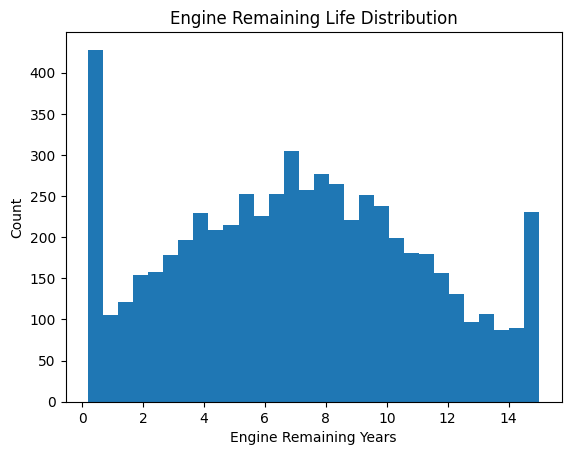

In [436]:
plt.hist(df_engine["Engine_Remaining_Years"], bins=30)
plt.xlabel("Engine Remaining Years")
plt.ylabel("Count")
plt.title("Engine Remaining Life Distribution")

In [437]:
df_engine["Engine_Remaining_Years"].describe()

count    6000.000000
mean        7.082633
std         4.000700
min         0.200000
25%         3.989098
50%         7.051048
75%         9.961641
max        15.000000
Name: Engine_Remaining_Years, dtype: float64

Text(0.5, 1.0, 'Km Driven vs Engine Remaining Life')

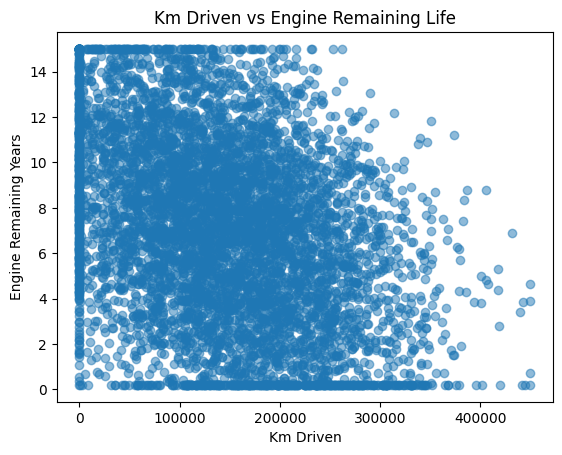

In [438]:
plt.scatter(df_engine["Km_Driven"], df_engine["Engine_Remaining_Years"], alpha=0.5)
plt.xlabel("Km Driven")
plt.ylabel("Engine Remaining Years")
plt.title("Km Driven vs Engine Remaining Life")

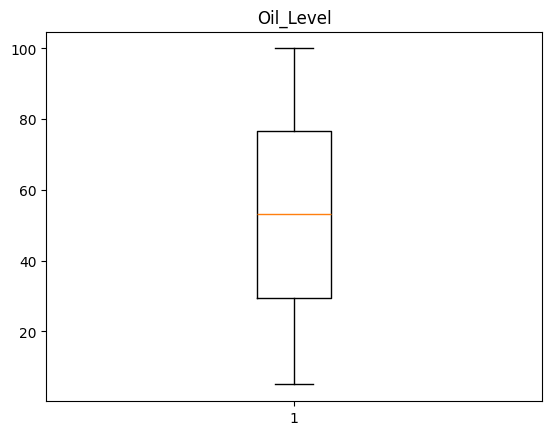

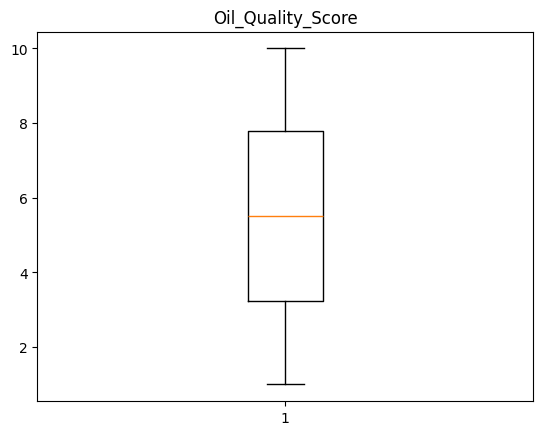

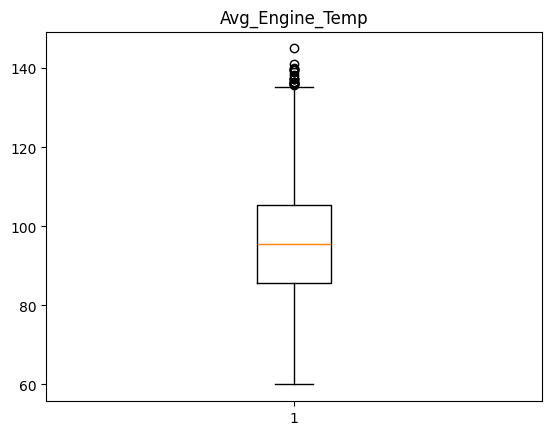

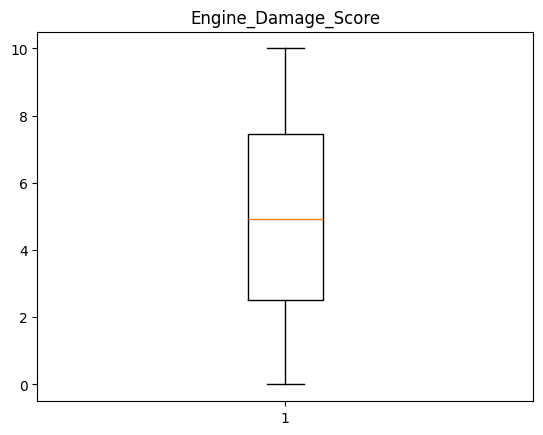

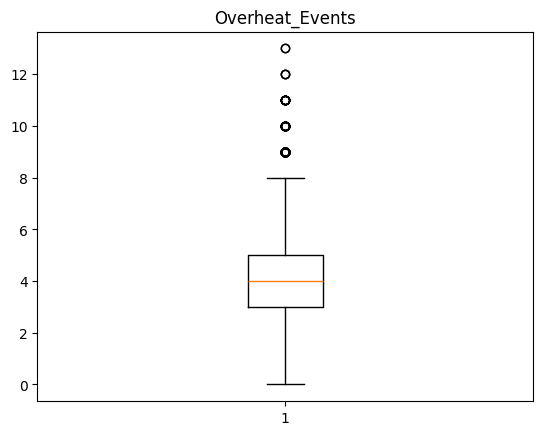

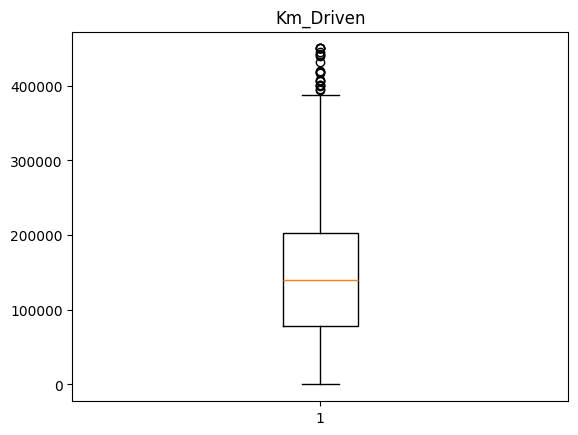

In [439]:
features = [
    "Oil_Level",
    "Oil_Quality_Score",
    "Avg_Engine_Temp",
    "Engine_Damage_Score",
    "Overheat_Events",
    "Km_Driven"
]

for col in features:
    plt.boxplot(df_engine[col].dropna())
    plt.title(col)
    plt.show()

In [440]:
feature_cols = [
    "Km_Driven",
    "Oil_Level",
    "Oil_Quality_Score",
    "Avg_Engine_Temp",
    "Engine_Damage_Score"
]
df_engine['Overheat_Events']=df_engine['Overheat_Events'].fillna(df_engine['Overheat_Events'].mode()[0])
for col in feature_cols:
    df_engine[col] = df_engine[col].fillna(df_engine[col].median())

In [441]:
df_engine.isna().sum()

Car_ID                    0
Oil_Level                 0
Oil_Quality_Score         0
Avg_Engine_Temp           0
Engine_Damage_Score       0
Overheat_Events           0
Km_Driven                 0
Engine_Remaining_Years    0
dtype: int64

In [442]:
x = df_engine.drop(columns=["Engine_Remaining_Years", "Car_ID"])
y = df_engine["Engine_Remaining_Years"]

In [443]:
for col in x.columns:
    lower = x[col].quantile(0.01)
    upper = x[col].quantile(0.99)
    x[col] = x[col].clip(lower, upper)


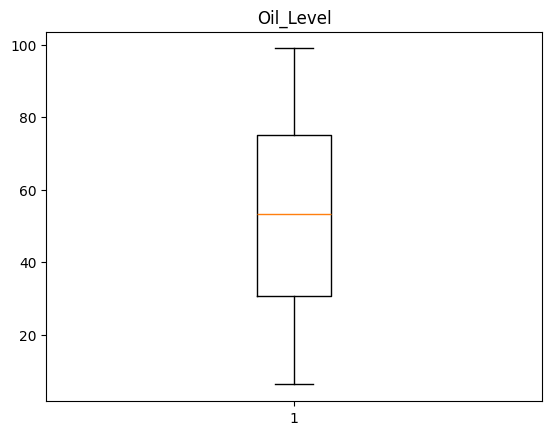

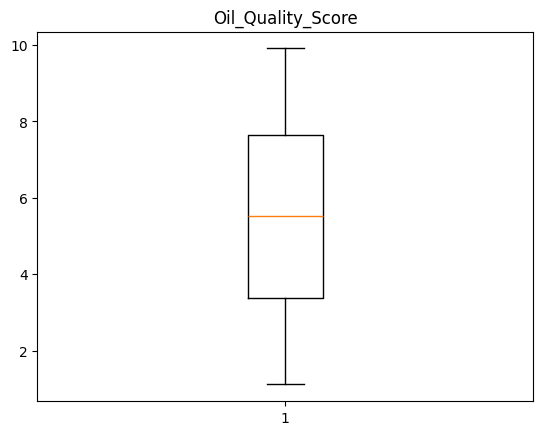

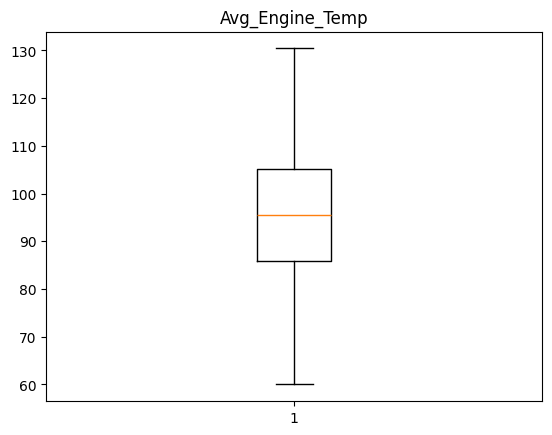

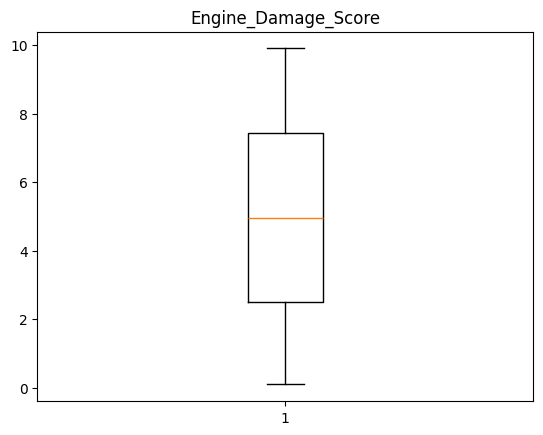

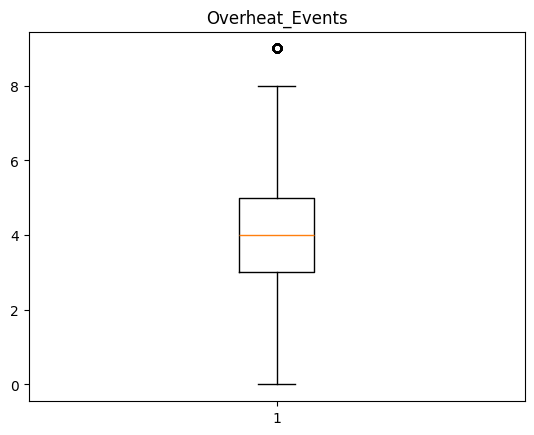

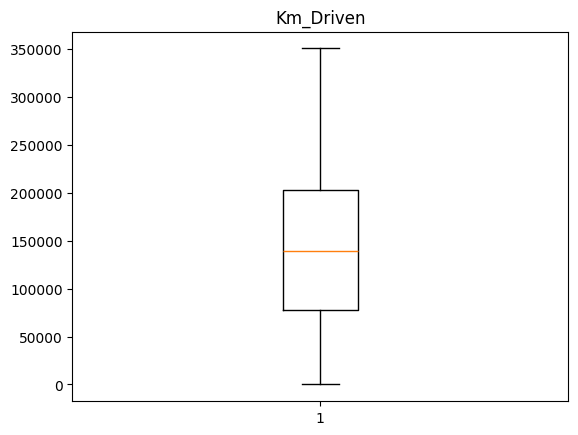

In [444]:

for col in features:
    plt.boxplot(x[col].dropna())
    plt.title(col)
    plt.show()

In [445]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)


In [446]:

from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,         
    min_samples_leaf=16,    
    random_state=42
)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)


In [447]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)


MAE : 1.7121101778868282
RMSE: 2.1109468335056274
R2  : 0.7095859194171911


In [448]:
df_engine["Predicted_Engine_Remaining_Years"] = model.predict(df_engine.drop(columns=["Car_ID", "Engine_Remaining_Years"]))


In [449]:
def engine_maintenance_status(years):
    if years < 2:
        return "Immediate Repair"
    elif years < 5:
        return "Service Soon"
    else:
        return "Healthy"

In [450]:
df_engine.loc[:, "Engine_Maintenance_Status"] = (
    df_engine["Predicted_Engine_Remaining_Years"]
    .apply(engine_maintenance_status)
)

In [451]:
df_engine[[
    "Car_ID",
    "Predicted_Engine_Remaining_Years",
    "Engine_Maintenance_Status"
]].head(10)

,Car_ID,Predicted_Engine_Remaining_Years,Engine_Maintenance_Status
0,1,8.657176,Healthy
1,2,8.951712,Healthy
2,3,13.425888,Healthy
3,4,3.424065,Service Soon
4,5,4.600527,Service Soon
5,6,6.008755,Healthy
6,7,1.214806,Immediate Repair
7,8,10.263462,Healthy
8,9,7.253900,Healthy
9,10,1.436158,Immediate Repair


In [452]:
df_engine['Engine_Maintenance_Status'].value_counts()

Engine_Maintenance_Status
Healthy             4221
Service Soon        1535
Immediate Repair     244
Name: count, dtype: int64

In [453]:
import joblib

joblib.dump(model, "engine_model.pkl")


['engine_model.pkl']

In [454]:
print("Train R2:", model.score(x_train, y_train))
print("Test R2 :", model.score(x_test, y_test))

Train R2: 0.7507746901216859
Test R2 : 0.7095859194171911
